#### MPAS time series plotting
- Read MPAS cells
- Specify location  
- Read MPAS and interpolate data 
- Create the figure

In [ ]:
%matplotlib inline
 
import numpy as np
import xarray as xr

import matplotlib.tri as tri
import matplotlib.pyplot as plt
 
from scipy.interpolate import griddata 

#### Read MPAS Cells

In [ ]:
flnm_ini = '/gpfs/fs1/p/mmm/c3we/MPAS-Release-5.2/CLIM/2010/x1.40962.init.nc'
ds_i = xr.open_dataset(flnm_ini)
ds_i = ds_i.squeeze()

# Convert to degrees from radians
ds_i["lonCell"] = np.degrees(ds_i.lonCell)
ds_i["latCell"] = np.degrees(ds_i.latCell)

# For Global tripcolor plot
# Add cyclic point before computing the triangulation
ds_i["lonCell"] = ((ds_i["lonCell"] + 180) % 360) - 180

# MPAS data point coordinates.
points = np.array([ds_i["lonCell"].values , ds_i["latCell"].values]).transpose()

triang = tri.Triangulation(ds_i.lonCell, ds_i.latCell)

#### specify the location 

In [ ]:
# # Create the start point and end point for the cross section
# Points at which to interpolate data.
lat_pt, lon_pt = (39,-110) 

##### Read MPAS data  

In [ ]:
# the variable to be interpolated 
var_s = 't2m'

dir_i = '/gpfs/fs1/p/mmm/c3we/MPAS-Release-5.2/CLIM/2010/'

data_1d = np.empty((24))

for nh in range(24):
    hh_s = str(nh).zfill(2)
    flnm = dir_i + 'diag.2011-04-22_' + hh_s + '.00.00.nc'
    print(flnm)
    ds = xr.open_dataset(flnm)
    ds = ds.squeeze()
    t2 = ds[var_s]
    data_1d[nh] = griddata(points, t2.values, (lon_pt, lat_pt), method='nearest')

#### Time series plotting

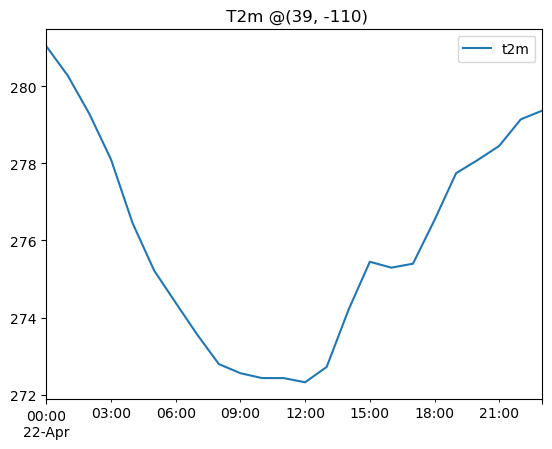

In [73]:
import pandas as pd
 
datetime = pd.date_range('2011-04-22 00', periods=24,  freq='h')

df = pd.DataFrame(data = data_1d, 
                  index = datetime,
                  columns = ['t2m'])

df.plot(title=' T2m @(39, -110)');
 

#### For double check using variable resolution (92-25km) mesh

In [64]:
dir_i = '/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/'

flnm_ini = dir_i + 'x4.163842.init.nc'
print(flnm_ini)
ds_x4 = xr.open_dataset(flnm_ini)
ds_x4 = ds_x4.squeeze()

# Convert to degrees from radians
ds_x4["lonCell"] = np.degrees(ds_x4.lonCell)
ds_x4["latCell"] = np.degrees(ds_x4.latCell)

# For Global tripcolor plot
# Add cyclic point before computing the triangulation
ds_x4["lonCell"] = ((ds_x4["lonCell"] + 180) % 360) - 180

# MPAS data point coordinates.
points_x4 = np.array([ds_x4["lonCell"].values , ds_x4["latCell"].values]).transpose()

triang_x4 = tri.Triangulation(ds_x4.lonCell, ds_x4.latCell)
points_x4.shape

/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/x4.163842.init.nc


(163842, 2)

In [65]:
data_x4 = np.empty((24))

for nh in range(24):
    hh_s = str(nh).zfill(2)
    flnm = dir_i + 'diag.2011-04-22_' + hh_s + '.00.00.nc'
    print(flnm)
    ds_x4 = xr.open_dataset(flnm)
    ds_x4 = ds_x4.squeeze()
    t2 = ds_x4[var_s]
    data_x4[nh] = griddata(points_x4, t2.values, (lon_pt, lat_pt), method='nearest')

/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_00.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_01.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_02.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_03.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_04.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_05.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_06.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_07.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_08.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_09.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_10.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_11.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_12.00.00.nc
/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_13.00.00.nc
/gpfs/fs1/p/mmm/c3we

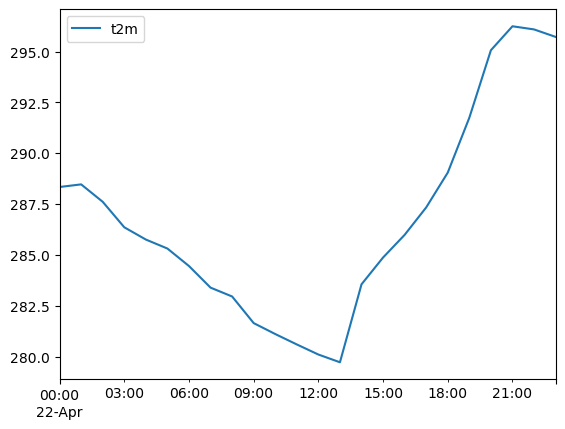

In [67]:
df = pd.DataFrame(data = data_x4, 
                  index = datetime,
                  columns = ['t2m'])
df.plot(title=' T2m @(39, -110)');

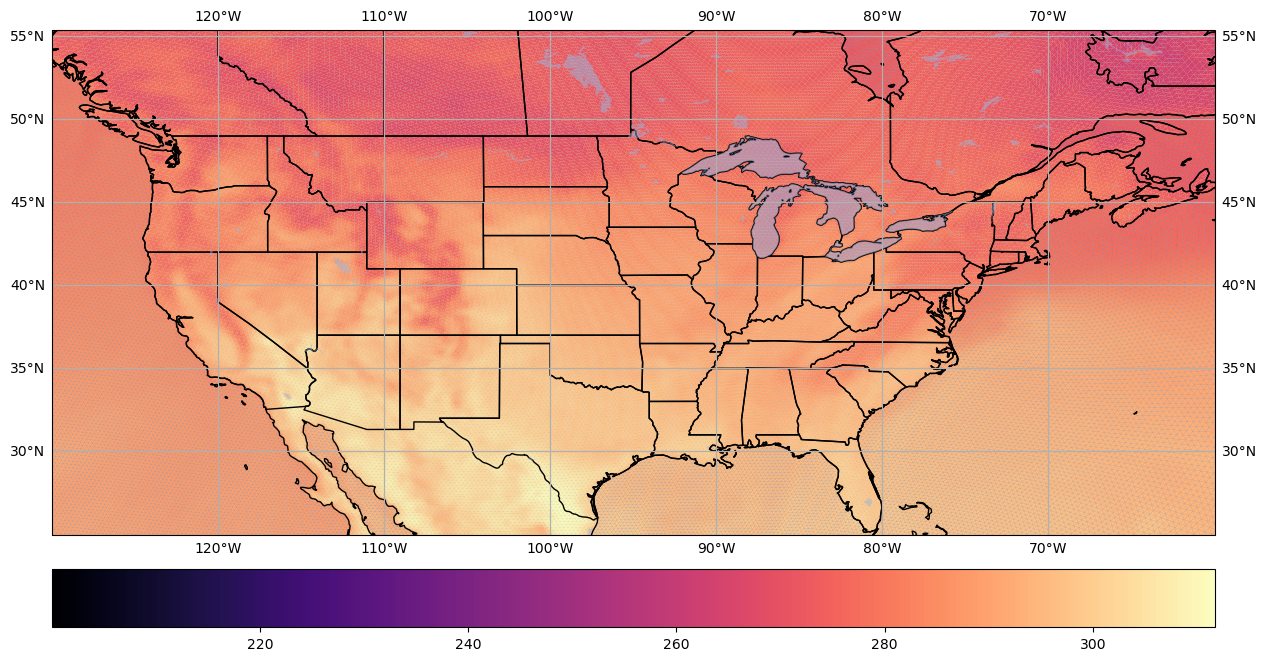

In [68]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ds_x4 = xr.open_dataset('/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/diag.2011-04-22_23.00.00.nc')
ds_x4 = ds_x4.squeeze()
t2m_x4 =  ds_x4.t2m

ds_x4 = xr.open_dataset('/gpfs/fs1/p/mmm/c3we/MPAS-Model/CLIM/2010/x4.163842.init.nc')
ds_x4 = ds_x4.squeeze()

# Convert to degrees from radians
ds_x4["lonCell"] = np.degrees(ds_x4.lonCell)
ds_x4["latCell"] = np.degrees(ds_x4.latCell)

# Global tripcolor plot
# Add cyclic point before computing the triangulation
ds_x4["lonCell"] = ((ds_x4["lonCell"] + 180) % 360) - 180
triang_x4 = tri.Triangulation(ds_x4.lonCell, ds_x4.latCell)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#ax.set_global()
# Set lat/lon bounding box and feature resolutions.
ax.set_extent([-130, -60, 25, 50])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.COASTLINE)

ax.gridlines()

gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

mm = ax.tripcolor(triang_x4,
                  t2m_x4,
                  edgecolors='k',
                  lw=0.01,
                  alpha=1,
                  transform=ccrs.PlateCarree(),
                  cmap='magma')

plt.colorbar(mm, orientation='horizontal', pad=0.03);